# Keras API Project
## Santiago Luco

#### Objective: Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.
The "loan_status" column contains the label.

LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## 1) Preliminars

In [1]:
# Import of essentials for python and data visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Data retrieve

df = pd.read_csv('/Users/santiagoluco/Library/CloudStorage/GoogleDrive-santiagoluco@lucotech.net/Unidades compartidas/Programación/Python y Machine Learning/Refactored_Py_DS_ML_Bootcamp-master/20-bis-Tensorflow/TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [3]:
# Info retrieve

df_info = pd.read_csv('/Users/santiagoluco/Library/CloudStorage/GoogleDrive-santiagoluco@lucotech.net/Unidades compartidas/Programación/Python y Machine Learning/Refactored_Py_DS_ML_Bootcamp-master/20-bis-Tensorflow/TensorFlow_FILES/DATA/lending_club_info.csv')

## 2) Dataframe overall visualization

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
df.info()

# There are null values
# There are also date as strings/object types
# There is a mix of categorical and continuous variables, many object types to process (get dummies? drop?)
# loan_status has our label to predict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.describe().transpose()

# Seems that there are numerical variables that are categorical (ie. )

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [7]:
pd.options.display.max_colwidth = 200
df_info

# These are the description and meaning of each variable

,LoanStatNew,Description
0,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if the loan originates.
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when applying for the loan.*
7,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
9,annual_inc,The self-reported annual income provided by the borrower during registration.


## 3) Data visualization and comprehension

In [8]:
# Firstly, I like to see a big picture of the variables in terms of correlation among them
# So I ran the corr method to see values

df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot: >

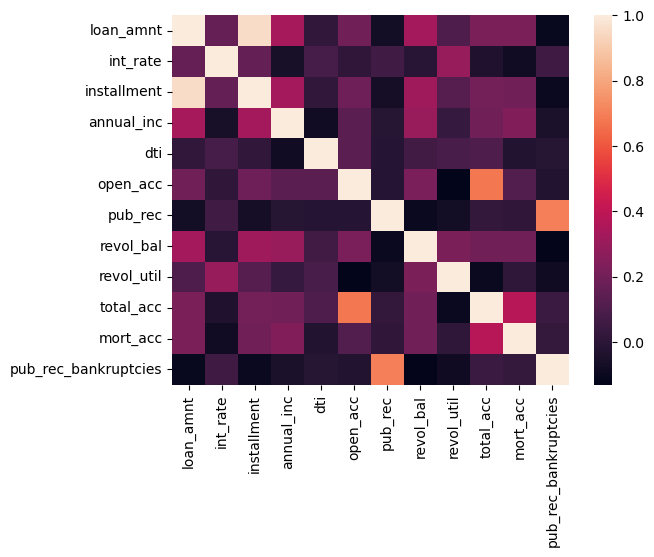

In [9]:
# Also those values in a heatmap can be usefull

sns.heatmap(df.corr(numeric_only=True))

# Is seems to be specially hightlighted installment vs loan_amount

<AxesSubplot: xlabel='loan_amnt', ylabel='installment'>

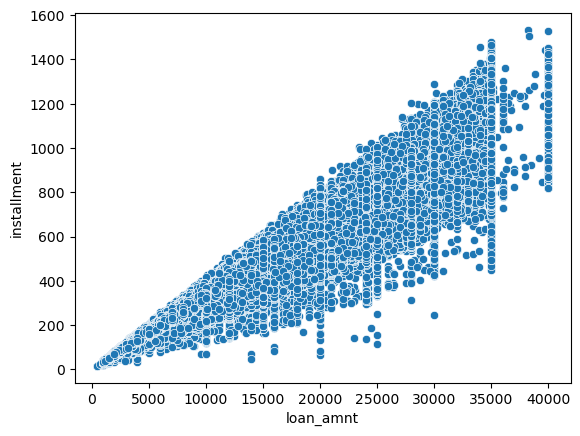

In [10]:
# Going into detaail about this possible correlation

sns.scatterplot(data=df,x='loan_amnt',y='installment')

# Not necessarily correlated, the installment and the loan amount. But obviously, it is highly related.

In [11]:
# Then we can see the correlation of the numeric variables vs loan status (our label)
# We need previously to change this variable to a 0/1 variable instead of object/string

In [12]:
def sepago(estado):
    if estado == 'Fully Paid':
        return 1
    elif estado == 'Charged Off':
        return 0
    
df['loan_repaid'] = df['loan_status'].apply(sepago)

<AxesSubplot: >

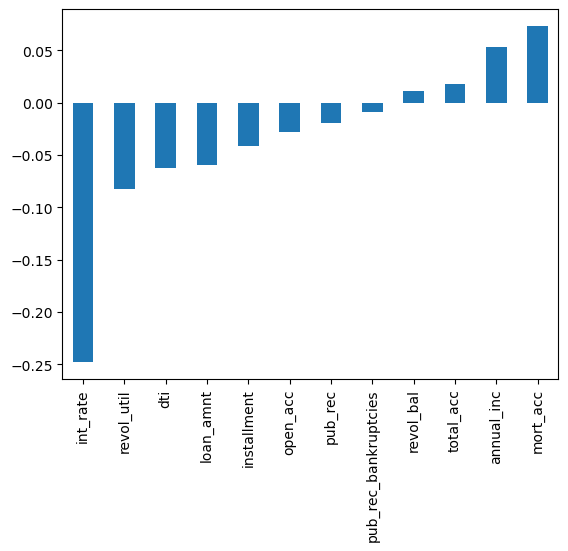

In [13]:
df.corr(numeric_only=True)['loan_repaid'][:-1].sort_values(ascending=True).plot.bar()

# Everything is showing normal

## 4) Data pre processing: missing data

In [14]:
# List of missing data per variable

df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [15]:
# Same list but in relative terms vs total rows

df.isna().sum() / df.count() * 100

# We are going to go one by one analyzing each case

loan_amnt                0.000000
term                     0.000000
int_rate                 0.000000
installment              0.000000
grade                    0.000000
sub_grade                0.000000
emp_title                6.144952
emp_length               4.845008
home_ownership           0.000000
annual_inc               0.000000
verification_status      0.000000
issue_d                  0.000000
loan_status              0.000000
purpose                  0.000000
title                    0.445121
dti                      0.000000
earliest_cr_line         0.000000
open_acc                 0.000000
pub_rec                  0.000000
revol_bal                0.000000
revol_util               0.069740
total_acc                0.000000
initial_list_status      0.000000
application_type         0.000000
mort_acc                10.550337
pub_rec_bankruptcies     0.135274
address                  0.000000
loan_repaid              0.000000
dtype: float64

#### Missing data in emp_title

In [16]:
# Let explore this variable

df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [17]:
len(df['emp_title'].unique())

# There is a lot of Employment Titles, this not seems to be significant (getting dummies from this can be caotic)

173106

In [18]:
# It is decided to drop this column/variable

df.drop('emp_title',axis=1,inplace=True)

#### Missing data in emp_length

In [19]:
# Let's explore this variable

df['emp_length'].value_counts()

# Not too many classes, seems ok from this perspective

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [20]:
# Let's see the correlation of this variable with the loan_status, to understand if this variable is worthy
# or not for the purpose of our project

<AxesSubplot: xlabel='emp_length', ylabel='count'>

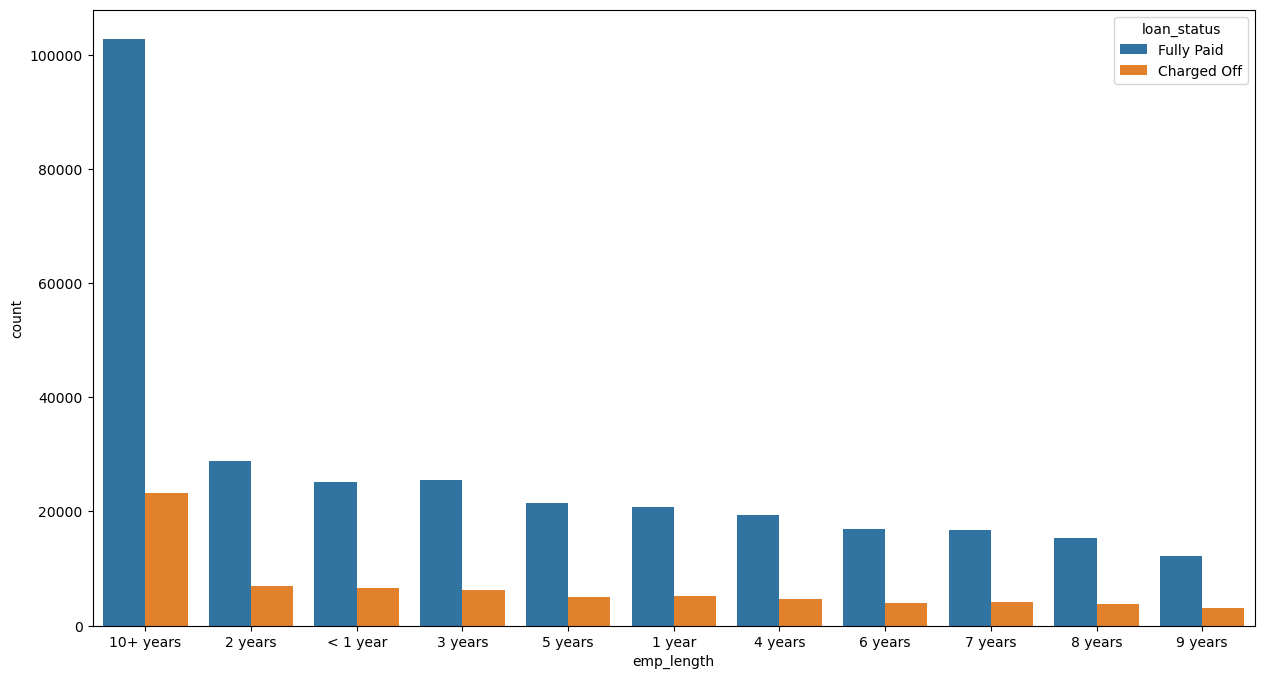

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='emp_length',order=df['emp_length'].value_counts().index,hue='loan_status')

# This is showing the same behavior of the variable loan_status in both cases (same change in bars). Not relevant.

In [22]:
# Besides we can see if there is a particular behaviour in relative terms between both variables.
# We can see the % of loans charged off per class in employment length, to see if there is something relevant

df[df['loan_status'] == 'Charged Off'].groupby('emp_length')['loan_status'].count() / df.groupby('emp_length')['loan_status'].count() * 100

# As per the table below, there is nothing particular in this.
# We can drop this variable out, and forget about the missing data as well

emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: loan_status, dtype: float64

In [23]:
df.drop('emp_length',axis=1,inplace=True)

#### Missing data in title

In [24]:
# Let's see some counting on this variable

df['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [25]:
len(df['title'].unique())

# There are too many titles, getting dummies from here could be a real big problem

48818

In [26]:
# But there is a similar variable called "purpose" with some classification over this "titles"

df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [27]:
# So we can drop out this variable because is not relevant since we have already purpose, with no missing data as well

df.drop('title',axis=1,inplace=True)

#### Missing data in "revol_util" and "pub_rec_bankruptcies"

In [28]:
# In this both cases, rows with missing data in these two variables are too few, so we can delete the rows
# with major impact in data consistency

df.dropna(subset=['revol_util','pub_rec_bankruptcies'],inplace=True)

#### Missing data in "mort_acc"

In [29]:
# Let's explore this variable
# Recaping, we have around 10% of missing values in this variable

df['mort_acc'].value_counts()

0.0     139708
1.0      60384
2.0      49907
3.0      38022
4.0      27865
5.0      18182
6.0      11059
7.0       6050
8.0       3120
9.0       1653
10.0       863
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [30]:
len(df['mort_acc'].unique())

# We have 34 different quantities of mortages accounts.

34

In [31]:
# The % of missing date is relevant, almost 10%

df['mort_acc'].isna().sum() / len(df) * 100

9.413768062770261

In [32]:
# Let's see the correlation of this variable with other variables available, trying to find the most switable for
# our estimation

df.corr(numeric_only=True)['mort_acc'].sort_values(ascending=False)[1:]

# Seems like total_acc is the most related to mort_acc, so we can use it to estimate the missing data

total_acc               0.381205
annual_inc              0.236277
loan_amnt               0.222381
revol_bal               0.195063
installment             0.193752
open_acc                0.109440
loan_repaid             0.073048
pub_rec_bankruptcies    0.027273
pub_rec                 0.011576
revol_util              0.007514
dti                    -0.025401
int_rate               -0.082656
Name: mort_acc, dtype: float64

In [33]:
# First, we create a look up table

lookup = df.groupby('total_acc')['mort_acc'].mean().round()

In [34]:
# We create a function to pass by the entire column

def reempl(valor_mort_acc,valor_total_acc):
    if np.isnan(valor_mort_acc):
        return lookup[valor_total_acc]
    else:
        return valor_mort_acc

In [35]:
# Then we pass by the function using apply()

df['mort_acc']  = df.apply(lambda x : reempl(x['mort_acc'],x['total_acc']),axis=1)

In [36]:
# Checking out, there are no null values left!

df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## 5) Categorical data an dummies

In [37]:
# Firstly we can see which variables are string/object types

df.select_dtypes([object]).columns

# We are going to go through each variable to analyze what to do

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### term

In [38]:
# Let's explore the variable

df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [39]:
# We can simply change this classes into numbers

df['term'] = df['term'].apply(lambda x : int(x[1:3]))

### grade

In [40]:
# Let's explore the variable

df['grade'].value_counts()

B    115812
C    105775
A     64056
D     63364
E     31427
F     11740
G      3045
Name: grade, dtype: int64

In [41]:
# We have sub_grades also available

df['sub_grade'].value_counts()

B3    26611
B4    25558
C1    23609
C2    22541
B2    22457
B5    22046
C3    21178
C4    20232
B1    19140
A5    18500
C5    18215
D1    15947
A4    15763
D2    13916
D3    12196
D4    11625
A3    10537
A1     9717
D5     9680
A2     9539
E1     7906
E2     7410
E3     6196
E4     5354
E5     4561
F1     3530
F2     2756
F3     2277
F4     1782
F5     1395
G1     1057
G2      752
G3      552
G4      371
G5      313
Name: sub_grade, dtype: int64

In [42]:
# These two variables are related, so we can just drop out "grade"

df.drop('grade',axis=1,inplace=True)

### sub_grade

In [43]:
# Creating dummies from sub_grade, dropping out the first column of the dummies to avoid fake correlation

sub_grade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),sub_grade_dummies],axis=1)

### home_ownership

In [44]:
# Let's explore the variable

df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [45]:
# We can group other+none+any = other to make this more relevant, on the extremes of the distribution

def reempl(x):
    if x=='ANY':
        return 'OTHER'
    elif x=='NONE':
        return 'OTHER'
    else:
        return x
    
df['home_ownership'] = df['home_ownership'].apply(reempl)

In [46]:
# Now we create the dummies over these classes

home_ownership_dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),home_ownership_dummies],axis=1)

### verification_status, application_type,initial_list_status,purpose

In [47]:
# We can analyze these variables together

df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [48]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [49]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [50]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [51]:
# All these is showing out very normal, so we can go ahead creating the dummies for each class en each variable

many_dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)
df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1,inplace=True)
df = pd.concat([df,many_dummies],axis=1)

### issue_d

In [52]:
# Let's explore the variable

df['issue_d'].value_counts()

# The fact is that this is information that we wouldn't have prior to any data analysis, so we can drop this out

Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Oct-2007        1
Nov-2007        1
Aug-2007        1
Name: issue_d, Length: 112, dtype: int64

In [53]:
df.drop('issue_d',axis=1,inplace=True)

In [54]:
df.select_dtypes([object]).columns

Index(['loan_status', 'earliest_cr_line', 'address'], dtype='object')

### loan_status

In [55]:
# We have already transform this variable in a boolean one in "loan_repaid" so we can drop this out

df.drop('loan_status',axis=1,inplace=True)

### earliest_cr_lineabs

In [56]:
# Let's explore the variable

df['earliest_cr_line'].value_counts()

# We can take the year from this variable just to make it numerical

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jul-1955       1
Oct-1950       1
May-1958       1
Nov-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [57]:
# Extracting the year into a new column

df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x : int(x[-4:]))

In [58]:
# Dropping out the old variable

df.drop('earliest_cr_line',axis=1,inplace=True)

### address

In [59]:
# Let's explore the variable

df['address'].value_counts()

# We can take the zipcode from this variable and then we can get a categorical variable from this one

USCGC Smith\nFPO AE 70466                            8
USS Smith\nFPO AP 70466                              8
USS Johnson\nFPO AE 48052                            8
USNS Johnson\nFPO AE 05113                           8
USNS Johnson\nFPO AP 48052                           7
                                                    ..
43570 Maxwell Field Apt. 502\nEast John, NH 22690    1
9983 Turner Cove\nSouth Gregmouth, WV 70466          1
1312 Cody Shoal\nRalphfurt, CO 29597                 1
3841 Liu Crest\nClarkchester, NC 29597               1
787 Michelle Causeway\nBriannaton, AR 48052          1
Name: address, Length: 392898, dtype: int64

In [60]:
df['zip_code'] = df['address'].apply(lambda x : x[-5:])

In [62]:
# Now we can create dummies from this new variable, dropping the address one

zip_code_dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df.drop(['address','zip_code'],axis=1,inplace=True)
df = pd.concat([df,zip_code_dummies],axis=1)

### Recap

In [ ]:
# Everything seems now to be OK and ready for our model

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   open_acc                             395219 non-null  float64
 7   pub_rec                              395219 non-null  float64
 8   revol_bal                            395219 non-null  float64
 9   revol_util                           395219 non-null  float64
 10  total_acc                            395219 non-null  float64
 11  mort_acc     

## 5) Defining training and test datasets

In [66]:
# We are going to use train_test_split method from sklearn

from sklearn.model_selection import train_test_split

In [67]:
# We setup X and y variables for our train and test sets. We use values to avoid problems with Sequential model.

X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## 6) Normalizing data

In [70]:
# We use MinMaxScaler only fitting the X_train set of data to avoid data leakage to the test set

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 7) Creating the model

In [71]:
# Importing methods

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [73]:
# Let's see how many variables do we have in the dataframe

len(df.columns)

# So we have 78 independent variables and 1 labeled

79

In [75]:
# Building the model
# We are going to use 2 hidden layers, starting from 79 and going down by thirds
# Last one is sigmoid since we are looking to predict a categorical binary variable
# We use also Dropout to prevent overfitting

model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

2022-11-25 15:12:53.631014: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-25 15:12:53.632015: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro


In [76]:
# Fitting the model
# Epochs to be considered, 25 at first, we will analyze afterwards possible overfitting

model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25


2022-11-25 15:12:59.481718: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-25 15:13:00.050577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1236/1236 [==============================] - ETA: 0s - loss: 0.2968

2022-11-25 15:13:12.692524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1236/1236 [==============================] - 14s 9ms/step - loss: 0.2968 - val_loss: 0.2660
Epoch 2/25
1236/1236 [==============================] - 11s 9ms/step - loss: 0.2646 - val_loss: 0.2630
Epoch 3/25
1236/1236 [==============================] - 11s 9ms/step - loss: 0.2623 - val_loss: 0.2626
Epoch 4/25
1236/1236 [==============================] - 11s 9ms/step - loss: 0.2610 - val_loss: 0.2620
Epoch 5/25
1236/1236 [==============================] - 10s 8ms/step - loss: 0.2605 - val_loss: 0.2618
Epoch 6/25
1236/1236 [==============================] - 11s 9ms/step - loss: 0.2597 - val_loss: 0.2616
Epoch 7/25
1236/1236 [==============================] - 11s 9ms/step - loss: 0.2594 - val_loss: 0.2617
Epoch 8/25
1236/1236 [==============================] - 11s 9ms/step - loss: 0.2589 - val_loss: 0.2614
Epoch 9/25
1236/1236 [==============================] - 11s 9ms/step - loss: 0.2587 - val_loss: 0.2614
Epoch 10/25
1236/1236 [==============================] - 10s 8ms/step - loss: 0.2585

## Evaluation of Model Performance

In [77]:
# We are going to asses the performance of the model in terms of loss and val_loss

losses = pd.DataFrame(model.history.history)

<AxesSubplot: >

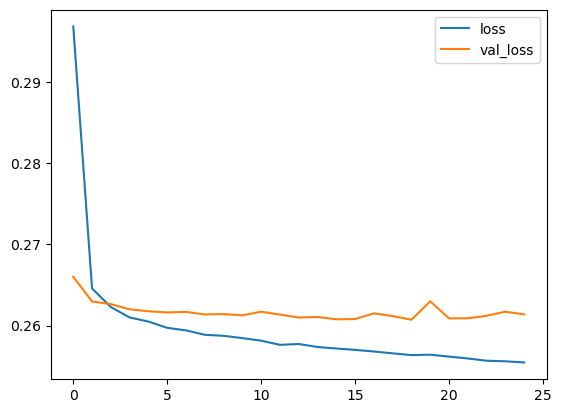

In [78]:
losses[['loss','val_loss']].plot()

# As we can see, val_loss shows steady at the end of the epochs process, so it is OK

### Model Predictions

In [80]:
# We are going to predict values using the X_test

predictions = (model.predict(X_test) > 0.5).astype("int32")

  50/2471 [..............................] - ETA: 5s

2022-11-25 15:22:21.929963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2471/2471 [==============================] - 5s 2ms/step


In [81]:
# We use for our assessment two methods as follows:

from sklearn.metrics import classification_report,confusion_matrix

In [82]:
print(classification_report(y_test,predictions))

# values obtained are really good, with an f1 score of 93%

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [83]:
confusion_matrix(y_test,predictions)

# Good values, with a good distribution in the matrix

array([[ 6863,  8795],
       [  115, 63271]])

### Test

In [84]:
# Given an aleatory customer, we will see if we give a loan or not (using our model)

import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [92]:
new_cust_pred = (model.predict(new_customer.values.reshape(1,78)) > 0.5).astype("int32")

1/1 [==============================] - 0s 299ms/step


In [93]:
new_cust_pred

array([[1]], dtype=int32)

In [94]:
df.iloc[random_ind]['loan_repaid']

1.0

In [95]:
# It matches!!!